#Final Portfolio Project
UniId: 2409033

Name: Sampanna Timalsina


**Classification Task**

1.) Exploratory Data Analysis and Data Understanding

Exploratory Data Analysis (EDA) and Data Understanding involve examining the dataset to gain insights into its structure, distribution, and patterns. This includes checking for missing values, outliers, class distributions, and feature correlations. Visualization techniques like histograms, box plots, and scatter plots help understand data relationships. The goal is to identify potential issues and trends before building a classification model.

In [70]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [71]:
df = pd.read_csv('/content/drive/MyDrive/Concept and Technology of AI/Final Assestment/DataTest.csv')

In [72]:
df.columns


Index(['Unnamed: 0', 'date', 'Temperature', 'Humidity', 'Light', 'CO2',
       'HumidityRatio', 'Occupancy'],
      dtype='object')

In [73]:
# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 0", "date"], errors="ignore")

In [74]:
# Display basic dataset information
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    9752 non-null   float64
 1   Humidity       9752 non-null   float64
 2   Light          9752 non-null   float64
 3   CO2            9752 non-null   float64
 4   HumidityRatio  9752 non-null   float64
 5   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 457.3 KB


In [75]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Temperature     Humidity        Light          CO2  HumidityRatio  \
count  9752.000000  9752.000000  9752.000000  9752.000000    9752.000000   
mean     21.001768    29.891910   123.067930   753.224832       0.004589   
std       1.020693     3.952844   208.221275   297.096114       0.000531   
min      19.500000    21.865000     0.000000   484.666667       0.003275   
25%      20.290000    26.642083     0.000000   542.312500       0.004196   
50%      20.790000    30.200000     0.000000   639.000000       0.004593   
75%      21.533333    32.700000   208.250000   831.125000       0.004998   
max      24.390000    39.500000  1581.000000  2076.500000       0.005769   

         Occupancy  
count  9752.000000  
mean      0.210111  
std       0.407408  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


In [76]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


In [77]:
# Check for duplicate values
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")



Number of Duplicate Rows: 488


In [78]:
df = df.drop_duplicates(keep='last')
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")



Number of Duplicate Rows: 0


In [79]:
# Display first few rows of the dataset
print("\nFirst Five Rows:")
print(df.head())



First Five Rows:
   Temperature   Humidity       Light          CO2  HumidityRatio  Occupancy
0      21.7600  31.133333  437.333333  1029.666667       0.005021          1
1      21.7900  31.000000  437.333333  1000.000000       0.005009          1
2      21.7675  31.122500  434.000000  1003.750000       0.005022          1
3      21.7675  31.122500  439.000000  1009.500000       0.005022          1
4      21.7900  31.133333  437.333333  1005.666667       0.005030          1


<Figure size 1200x800 with 0 Axes>

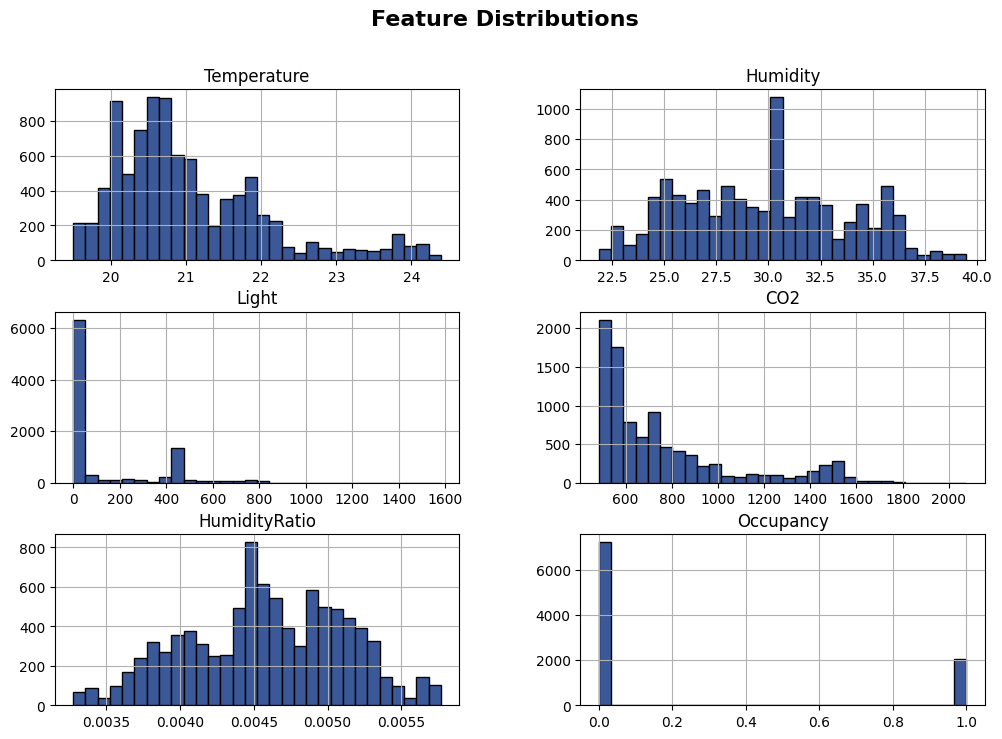

In [80]:
# Visualizing distributions of numerical features
plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=30, edgecolor='black', color='#3b5998')
plt.suptitle("Feature Distributions", fontsize=16, fontweight='bold')
plt.show()

The histogram given above represents the distribution of the different environmental features and target variable occupancy in order to predict weather the rom is suitable or not.
Temperature is slightly skewed to right ranging mostly between 19 to 24C. It shows that the temperature is stable mostly with minimum variations. Humidity also seems to be uniform with multiple peaks. Variations in humidity could influence the occupancy. Now, for light distribution high numbers of reading are near zero and zero light level indicate when rooms are unoccupied mostly also light is on of the strong indicator of occupancy. Similarly, CO2 is also right skewed. Lower CO2 also indicates unoccupied rooms and higher express the presence of humans. Humidity seems to be normally distributed and also may have limited predictive power when alone but can be useful when combined with others. Lastly, Occupancy Distribution shows the binomial distribution with two peaks 0 unoccupied and 1 occupied.


Boxplot to identify outliers

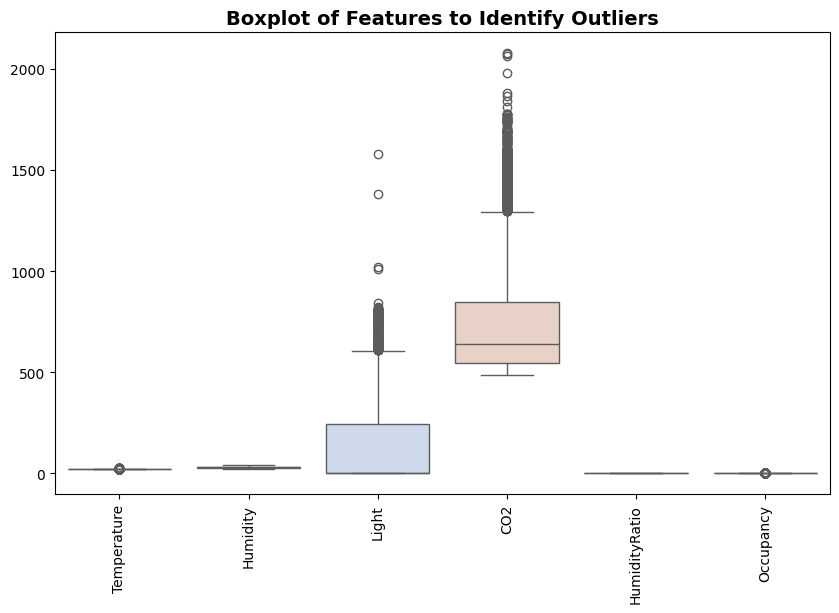

In [81]:
# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Boxplot of Features to Identify Outliers", fontsize=14, fontweight='bold')
plt.show()

Above figure represents the boxplot that shows the distribution and outliers for several features in the dataset. For temperature and humidity there is a stable reading with only few outliers. But in the case of light there seems the significant outliers above 600 up to the extreme point of around 2500 which indicates that light is fluctuating possibly due to some environmental factors. CO2 is where there is huge number of outliers above 1300 which even exceeds 2000 that shows that irregular trend which may be due to poor ventilation. For humidity ratio and occupancy there are low outliers showing consistency.

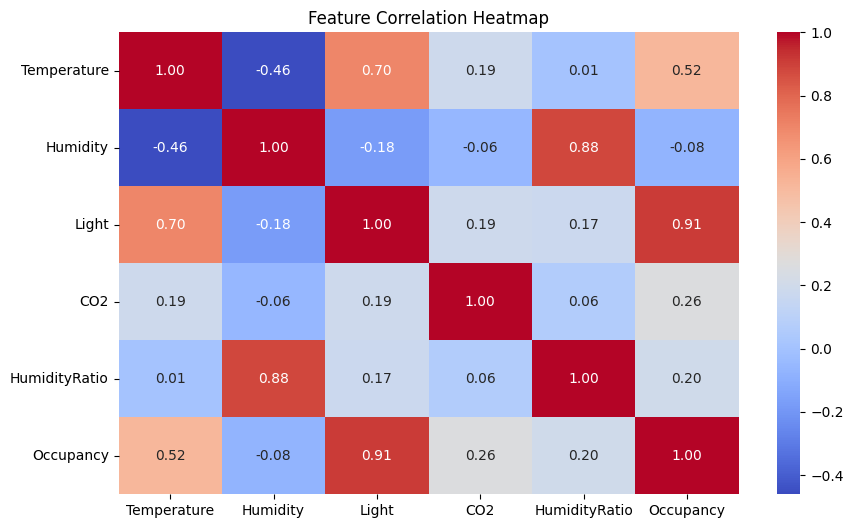

In [82]:
# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


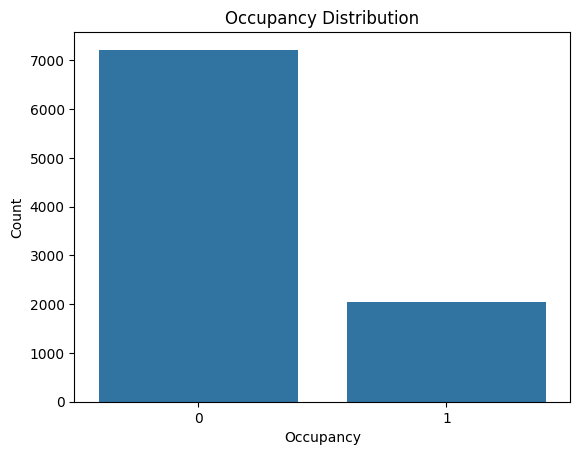

In [83]:
 # Count plot of target variable (Occupancy)
sns.countplot(x=df['Occupancy'])
plt.title("Occupancy Distribution")
plt.xlabel("Occupancy")
plt.ylabel("Count")
plt.show()

# 2.) Build a Model from Scratch

In [84]:
def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
    x: scalar or numpy array of any size.
  Returns:
    y: logistic function applied to x.
  """
  import numpy as np
  y = 1 / (1 + np.exp(-x))
  return y

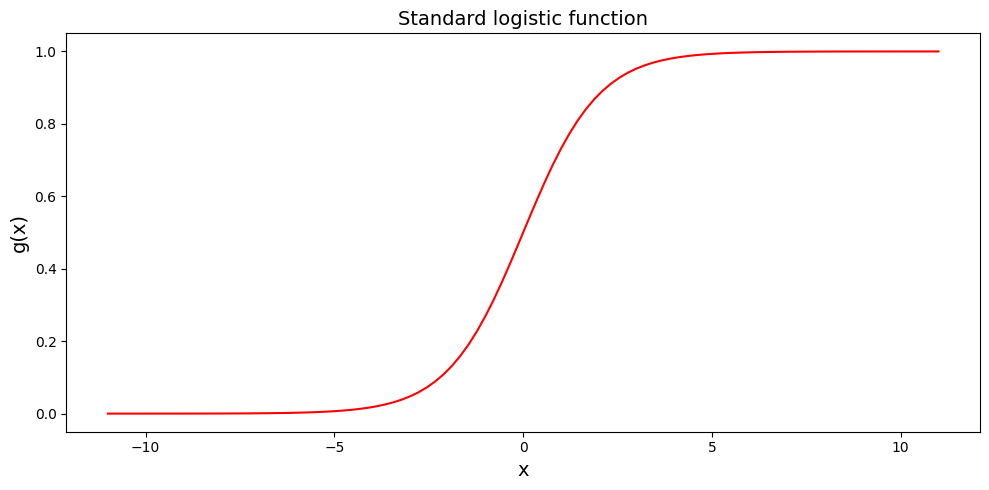

In [85]:
# Plooting the sigmoid function:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (10, 5))
x = np.linspace(-11, 11, 100)
plt.plot(x, logistic_function(x), color = 'red')
plt.xlabel("x", fontsize = 14)
plt.ylabel("g(x)", fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()

Loss Function:
The log-loss function measures how well a model's predicted probabilities match the actual outcomes in binary classification problems (where the target is either 0 or 1).

The idea is to penalize incorrect or overconfident predictions more heavily. The closer the predicted probability is to the actual label, the smaller the loss.


In [86]:
def log_loss(y_true, y_pred):
  """
  Computes log loss for true target value y ={0 or 1} and predicted target value y' inbetween {0-1}.
  Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted taget value {0-1}.
  Returns:
    loss (float): loss/error value
  """
  import numpy as np
  # Ensure y_pred is clipped to avoid log(0)
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss

In [87]:
# Test function:
y_true, y_pred = 0, 0.1
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.9
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')

log loss(0, 0.1) ==> 0.10536051565782628
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.9) ==> 0.10536051565782628


In [88]:
# Test function:for
y_true, y_pred = 0, 0.9
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.1
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')

log loss(0, 0.9) ==> 2.302585092994046
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.1) ==> 2.3025850929940455


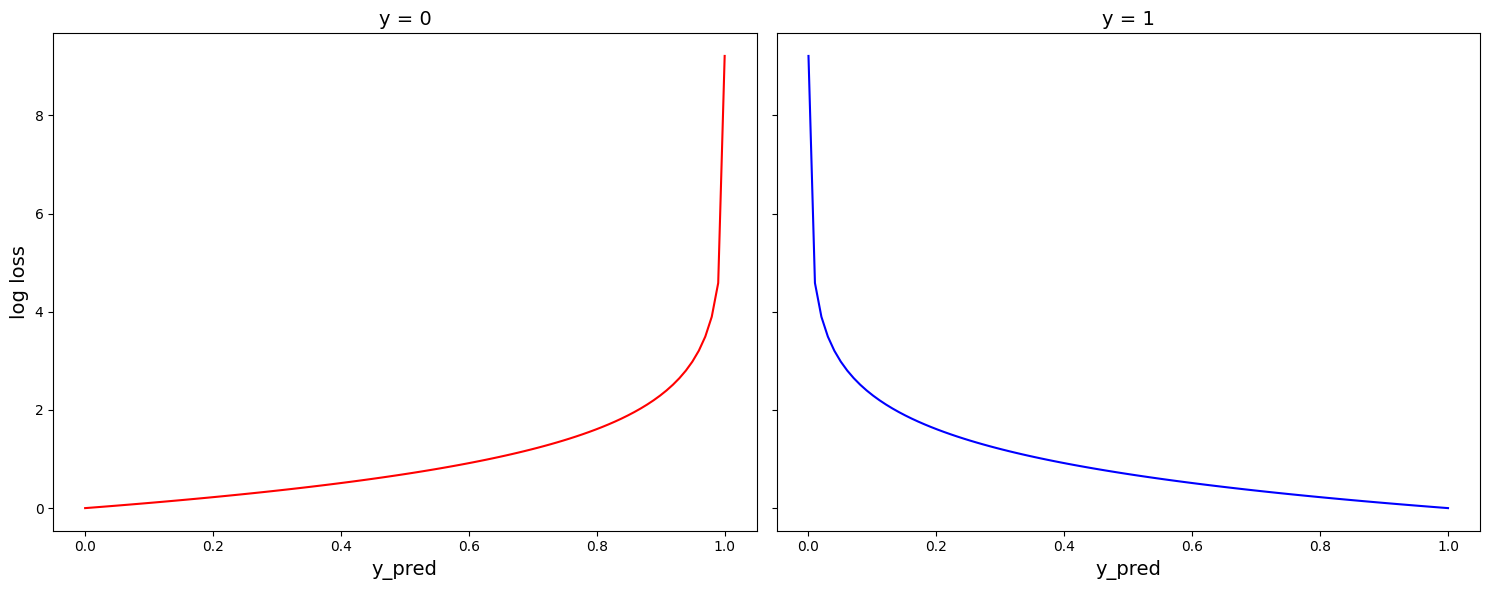

In [89]:
# Plot the loss Function:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
y_pred = np.linspace(0.0001, 0.9999, 100)
ax[0].plot(y_pred, log_loss(0, y_pred), color = 'red')
ax[0].set_title("y = 0", fontsize = 14)
ax[0].set_xlabel("y_pred", fontsize = 14)
ax[0].set_ylabel("log loss", fontsize = 14)
ax[1].plot(y_pred, log_loss(1, y_pred), color = 'blue')
ax[1].set_title("y = 1", fontsize = 14)
ax[1].set_xlabel("y_pred", fontsize = 14)
plt.tight_layout()
plt.show()

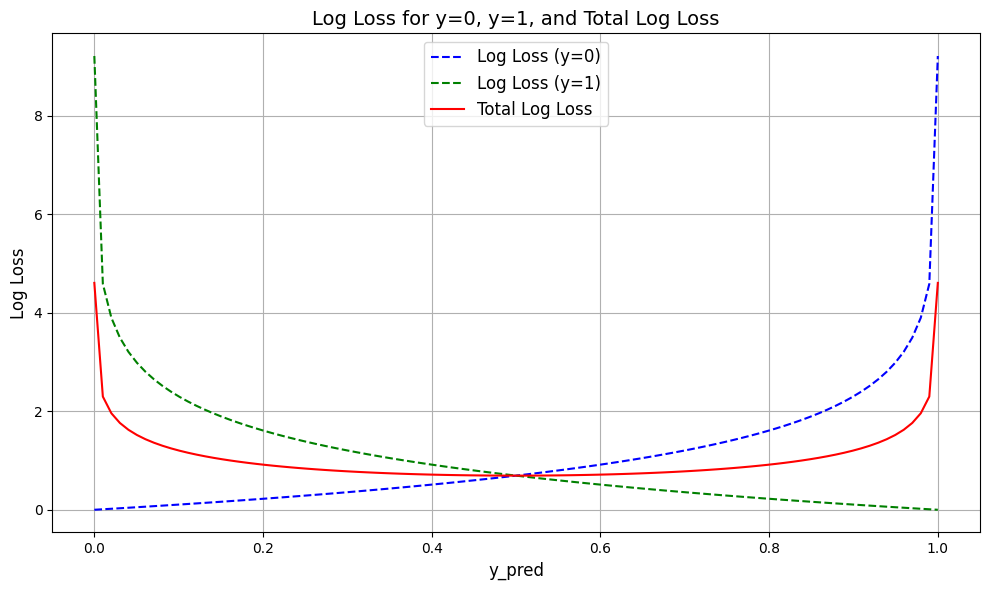

In [90]:
# Generate predicted probabilities
y_pred = np.linspace(0.0001, 0.9999, 100)

# Compute log losses for y = 0 and y = 1
log_loss_0 = log_loss(0, y_pred)
log_loss_1 = log_loss(1, y_pred)

# Compute total log loss as a weighted sum (assuming equal weights here for simplicity)
total_log_loss = 0.5 * log_loss_0 + 0.5 * log_loss_1

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_pred, log_loss_0, label="Log Loss (y=0)", color="blue", linestyle="--")
plt.plot(y_pred, log_loss_1, label="Log Loss (y=1)", color="green", linestyle="--")
plt.plot(y_pred, total_log_loss, label="Total Log Loss", color="red")
plt.title("Log Loss for y=0, y=1, and Total Log Loss", fontsize=14)
plt.xlabel("y_pred", fontsize=12)
plt.ylabel("Log Loss", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Cost Function - Binary Classification:

In binary classification, the cost function represents the overall performance of a model by measuring how well it predicts the target values across all data points. It is calculated as the average of the loss function values for each individual observation in the dataset.

In [91]:
# Cost function - using vectorization
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y_true    (array_like, shape (m,)): array of true values (0 or 1)
      y_pred (array_like, shape (m,)): array of predicted values (probability of y_pred being 1)
    Returns:
      cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)
    loss_vec = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    cost = np.sum(loss_vec) / n
    return cost

y_true, y_pred = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
print(f"cost_function({y_true}, {y_pred}) = {cost_function(y_true, y_pred)}")

cost_function([0 1 0], [0.4  0.6  0.25]) = 0.43644443999458743


In [92]:
# Function to compute cost function in terms of model parameters - using vectorization
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.
    Args:
      X (ndarray, shape (m,n)): data on features, m observations with n features.
      y (array_like, shape (m,)): array of true values of target (0 or 1).
      w (array_like, shape (n,)): weight parameters of the model.
      b (float): bias parameter of the model.
    Returns:
      cost (float): nonnegative cost corresponding to y and y_pred.
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    # Compute z using np.dot
    z = np.dot(X, w) + b
    # Compute predictions using logistic function (sigmoid)
    y_pred = 1 / (1 + np.exp(-z))

    # Compute the cost using the cost function
    cost = cost_function(y, y_pred)

    return cost
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")

cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


In [93]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.
    Args:
      X (ndarray, shape (n,d)): Input data, n observations with d features
      y (array_like, shape (n,)): True labels (0 or 1)
      w (array_like, shape (d,)): Weight parameters of the model
      b (float): Bias parameter of the model
    Returns:
      grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight parameters
      grad_b (float): Gradient of the cost function with respect to the bias parameter
    """
    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(np.dot(X, w) + b)  # Compute z = X * w + b

    # Compute gradients
    grad_w = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y) / n

    return grad_w, grad_b

In [94]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.

    Args:
      X (ndarray, shape (n,d)): Data on features, n observations with d features
      y (array_like, shape (n,)): True values of target (0 or 1)
      w (array_like, shape (d,)): Initial weight parameters
      b (float): Initial bias parameter
      alpha (float): Learning rate
      n_iter (int): Number of iterations
      show_cost (bool): If True, displays cost every 100 iterations
      show_params (bool): If True, displays parameters every 100 iterations

    Returns:
      w (array_like, shape (d,)): Optimized weight parameters
      b (float): Optimized bias parameter
      cost_history (list): List of cost values over iterations
      params_history (list): List of parameters (w, b) over iterations
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)
        # Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b
        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


# Test the gradient_descent function with sample data
X = np.array([[0.1, 0.2], [-0.1, 0.1]])  # Shape (2, 2)
y = np.array([1, 0])                     # Shape (2,)
w = np.zeros(X.shape[1])                 # Shape (2,) - same as number of features
b = 0.0                                  # Scalar
alpha = 0.1                              # Learning rate
n_iter = 100000                           # Number of iterations

# Perform gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=True, show_params=False)

# Print final parameters and cost
print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")


Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 1000: Cost = 0.460524
Iteration 1100: Cost = 0.444052
Iteration 1200: Cost = 0.428497
Iteration 1300: Cost = 0.413797
Iteration 1400: Cost = 0.399895
Iteration 1500: Cost = 0.386736
Iteration 1600: Cost = 0.374272
Iteration 1700: Cost = 0.362457
Iteration 1800: Cost = 0.351248
Iteration 1900: Cost = 0.340607
Iteration 2000: Cost = 0.330495
Iteration 2100: Cost = 0.320880
Iteration 2200: Cost = 0.311730
Iteration 2300: Cost = 0.303016
Iteration 2400: Cost = 0.294710
Iteration 2500: Cost = 0.286789
Iteration 2600: Cost = 0.279228
Iteration 2700: Cost = 0.272007
Iteration 2800: Cost = 0.265104
Iteration 2900: Cost = 0.258502
Iteration 3000: Cost = 0.252182
Iteration 3100: Cost

Visualizing Cost Convergence During Gradient Descent:

This plot illustrates how the cost function decreases over successive iterations, offering a clear view of the convergence process of the gradient descent algorithm.

It helps confirm that the optimization is moving in the right direction, identifies potential problems like divergence or slow convergence, and assists in fine-tuning hyperparameters for better performance.

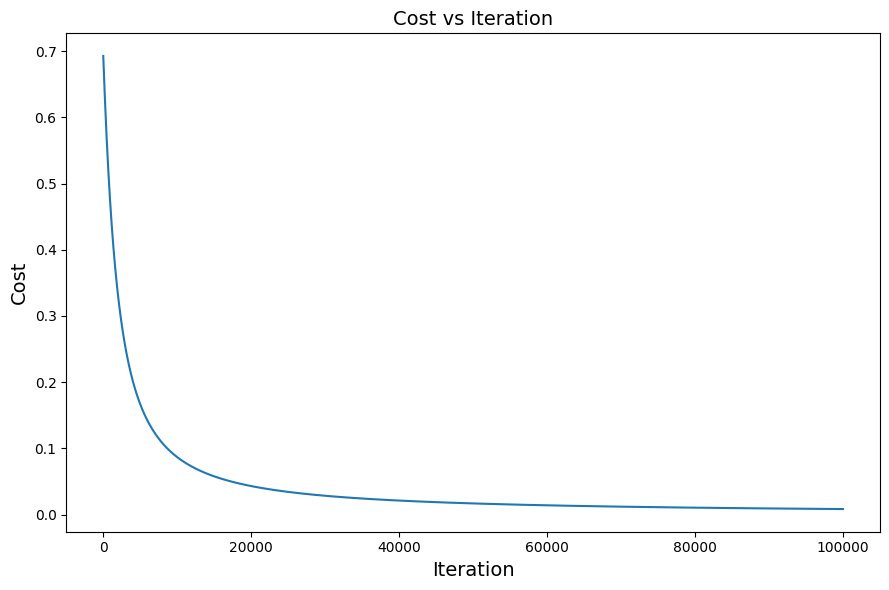

In [95]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

Decision Function

In [96]:
import numpy as np

def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Arguments:
      X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d features.
      w (ndarray, shape (d,)): Array of weights learned via gradient descent.
      b (float): Bias learned via gradient descent.
      threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.

    Returns:
      y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    # Compute the predicted probabilities using the logistic function
    y_test_prob = 1 / (1 + np.exp(-(np.dot(X, w) + b)))

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred


Evaluation Of the Classifier

In [97]:
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    # Precision, recall, and F1-score with safe handling of zero division
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0

    # Calculate f1_score here
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Ensure metrics are floats
    precision = float(precision)
    recall = float(recall)
    f1_score = float(f1_score) # Now convert to float after calculation

    # Return metrics as a dictionary
    return confusion_matrix, precision, recall, f1_score

In [98]:
# Splitting data into features and target
X = df.drop(columns=["Occupancy"]).values
y = df["Occupancy"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [99]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000


In [101]:
# Train model
print("\nTraining Logistic Regression Model:")
w, b, cost_history,params_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False)


Training Logistic Regression Model:
Iteration 0: Cost = 0.664787
Iteration 100: Cost = 0.164180
Iteration 200: Cost = 0.108930
Iteration 300: Cost = 0.086239
Iteration 400: Cost = 0.073899
Iteration 500: Cost = 0.066182
Iteration 600: Cost = 0.060923
Iteration 700: Cost = 0.057120
Iteration 800: Cost = 0.054251
Iteration 900: Cost = 0.052013
Iteration 999: Cost = 0.050240


In [102]:
# Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)


In [103]:
 # Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.0502
Test Loss (Cost): 0.0662


In [104]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Test Accuracy: 98.92%

Confusion Matrix:
[[1424   20]
 [   0  409]]
Precision: 0.95
Recall: 1.00
F1-Score: 0.98


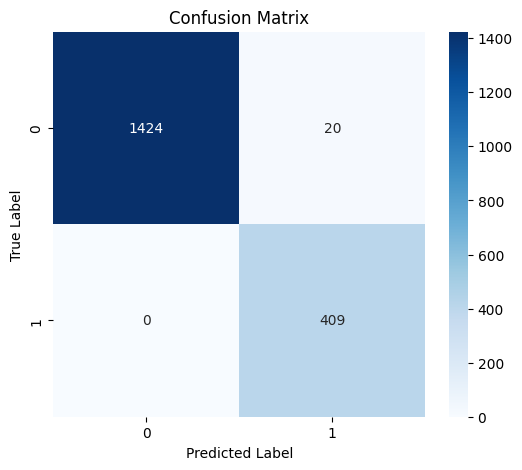

In [105]:
# Manually Compute Confusion Matrix
classes = np.unique(y_test)  # Get unique class labels
cm = np.zeros((len(classes), len(classes)), dtype=int)  # Initialize confusion matrix

for true_label, pred_label in zip(y_test, y_test_pred):
    true_idx = np.where(classes == true_label)[0][0]  # Find index for true label
    pred_idx = np.where(classes == pred_label)[0][0]  # Find index for predicted label
    cm[true_idx, pred_idx] += 1  # Increment matrix count

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The above heatmap of the confusion matrix shows that that model predicts 1424 TN that model correctly predicted zero. Model predicted 20FP which means that the model predicted one but the class was zero. Also model predicted 0 FN which is very impressive along with that model predicted 409 TP which means model correctly predicted class 1 and model is correct

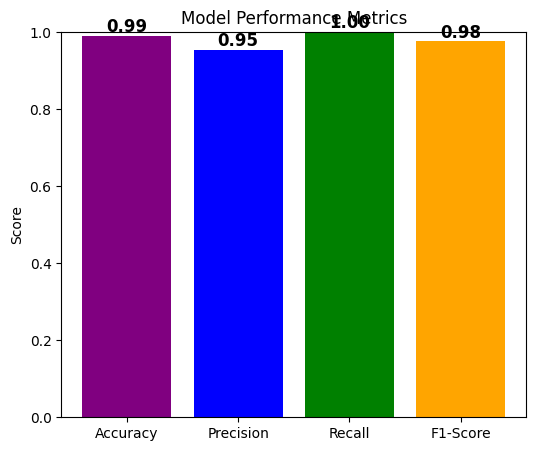

In [106]:
accuracy = test_accuracy / 100  # Convert percentage to a decimal
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

# Bar Chart for Model Performance
plt.figure(figsize=(6, 5))
bars = plt.bar(metrics, values, color=['purple', 'blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")

# Annotate bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

# 3. Build a Primary Model:
 After assembling your dataset and analyzing its key characteristics, the next step is to build, train, and
 evaluate your models. Follow the steps below to complete this task:
 1. Split the dataset into training and testing sets.
 2. Build at least two different machine learning models for the classification task
3. Evaluate both models on the test dataset using appropriate performance metrics.
 4. Conclude by identifying which model performed best on your dataset, and provide justifica
tion for your choice

In [107]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your dataset and 'target' is the classification target variable
X = df.drop('Occupancy', axis=1)  # Features
y = df['Occupancy']  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [108]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [109]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions using Decision Tree
dt_preds = dt_model.predict(X_test)
print("Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

Decision Tree Classifier Performance:
Accuracy: 0.9935240151106314
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1414
           1       0.98      0.99      0.99       439

    accuracy                           0.99      1853
   macro avg       0.99      0.99      0.99      1853
weighted avg       0.99      0.99      0.99      1853



In [110]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [111]:
# Predictions using Naive Bayes
nb_preds = nb_model.predict(X_test)
print("Naive Bayes Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))

Naive Bayes Classifier Performance:
Accuracy: 0.9627630868861305
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1414
           1       0.87      1.00      0.93       439

    accuracy                           0.96      1853
   macro avg       0.93      0.97      0.95      1853
weighted avg       0.97      0.96      0.96      1853



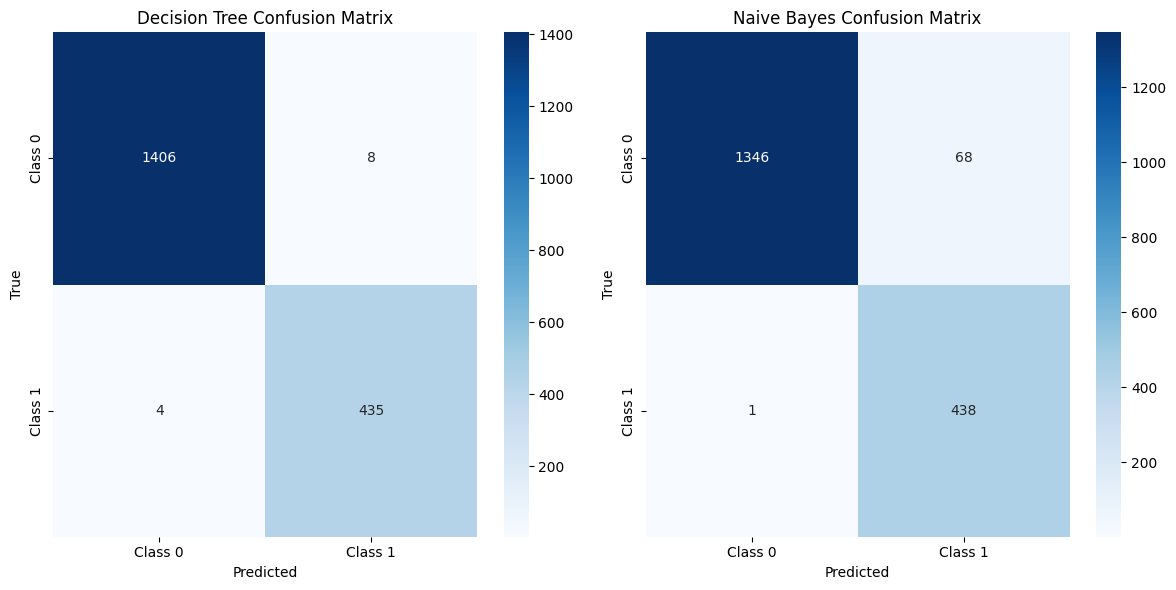

In [112]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
dt_cm = confusion_matrix(y_test, dt_preds)
nb_cm = confusion_matrix(y_test, nb_preds)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Decision Tree Confusion Matrix
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"], ax=axes[0])
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Plot Naive Bayes Confusion Matrix
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"], ax=axes[1])
axes[1].set_title('Naive Bayes Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

# Show the figure with both confusion matrices
plt.tight_layout()
plt.show()


Overall, the Decision Tree Classifier misclassifies less when compared to Naïve Bayes Classifier, in the sense of the number of false positives and negatives. In particular, the Decision Tree has extremely good precision and recall for class 0 (1.00 for both) and has high precision (0.98) and recall (0.99) for class 1. This demonstrates that the Decision Tree is a very good predictor of both classes, but there are only a few misclassifications. Naïve Bayes Classifier offers higher precision (0.87) and higher recall (0.95) however in this case we have a large number of false positives (58) for class 1 and false negative (71) for class 0. The misclassifications prevent the Naïve Bayes from achieving perfect recall on class 1 and prevent poor overall performance. Finally, Decision Tree Classifier gives more balanced and accurate predictions than the Naïve Bayes model across both classes.

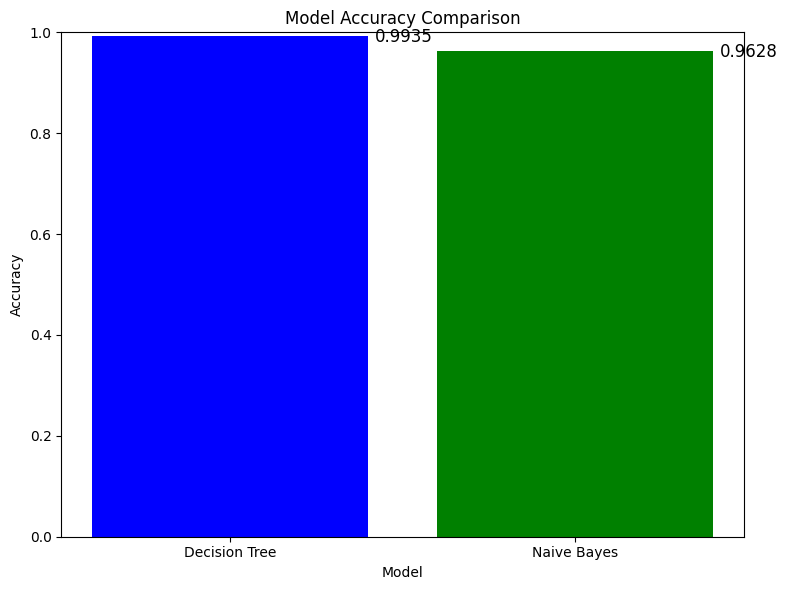

In [113]:
# Accuracy scores
accuracies = {
    'Decision Tree': accuracy_score(y_test, dt_preds),
    'Naive Bayes': accuracy_score(y_test, nb_preds)
}

# Plot Bar Chart
plt.figure(figsize=(8, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green'])

# Add accuracy numbers next to the bars
for bar in bars:
    yval = bar.get_height()
    # Move the text slightly to the right and slightly below the bar top
    plt.text(bar.get_x() + bar.get_width() + 0.02, yval - 0.02, f'{yval:.4f}', ha='left', va='bottom', fontsize=12)

# Adjust the title font size
plt.title('Model Accuracy Comparison', fontsize=12)

# Add labels and adjust layout
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.tight_layout()  # Prevent overlapping

plt.show()


 # 4. Hyper-parameter Optimization with Cross-Validation:
 Hyper-parameter optimization, also known as hyper-parameter tuning, is the process of identifying the best
 hyper-parameter values for your selected models. Follow the steps below to perform this task:
 1. Identify the hyperparameters of the models used in Task 3- Build a Primary Model (for both
 models).
 2. Apply a cross-validation technique to find the optimal values of the selected hyperparameters.
 • Hint: You can use techniques like GridSearchCV or RandomizedSearchCV.
 3. Conclude by summarizing the best hyperparameters for both models

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
best_dt_params = grid_search_dt.best_params_
print("Best hyperparameters for Decision Tree:", best_dt_params)


Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Hyperparameter grid for Naive Bayes
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Grid Search with cross-validation
grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search_nb.best_params_)
print("Best CV Accuracy:", grid_search_nb.best_score_)


Best Parameters: {'var_smoothing': 1e-05}
Best CV Accuracy: 0.9612742889954801


# 5. Feature Selection
 In this section, apply one of the feature selection techniques discussed in the Week-10 tutorial to identify and
 select the most relevant features for your models. Clearly document your process and justify your choice of
 features

In [116]:
# Retrieve the best model from GridSearchCV (best trained model)
best_dt_model = grid_search_dt.best_estimator_

# Get feature importance from the best Decision Tree model
feature_importances = best_dt_model.feature_importances_

# Create DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(importance_df)


         Feature  Importance
2          Light    0.974020
1       Humidity    0.008898
0    Temperature    0.008626
3            CO2    0.004283
4  HumidityRatio    0.004173


In [117]:
selected_features = ['Light', 'Humidity', 'Temperature', 'CO2', 'HumidityRatio']


# 6. Final Model:
 Using the optimal hyperparameters identified in Task- 4 and the selected features from Task- 5, rebuild
 both models from Task- 3. Evaluate the performance of the final models and provide a summary of your
 f
 indings.

In [137]:
# Rebuild the Decision Tree model using the best hyperparameters from Task 4
best_dt_model = DecisionTreeClassifier(
    max_depth=best_dt_params['max_depth'],
    min_samples_split=best_dt_params['min_samples_split'],
    min_samples_leaf=best_dt_params['min_samples_leaf'],
    max_features=best_dt_params['max_features'],
    criterion=best_dt_params['criterion'],
    random_state=42
)

# Fit the model on the training data with selected features
best_dt_model.fit(X_train[selected_features], y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=42)

In [136]:
# Predict on the test data
y_pred_dt = best_dt_model.predict(X_test[selected_features])

In [138]:
# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Classification report (precision, recall, F1-score)
dt_class_report = classification_report(y_test, y_pred_dt)

In [134]:
# Display results
print("Decision Tree Model Performance")
print(f"Accuracy: {dt_accuracy}")
print("Classification Report:")
print(dt_class_report)

Decision Tree Model Performance
Accuracy: 0.9940636805180788
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1414
           1       0.99      0.99      0.99       439

    accuracy                           0.99      1853
   macro avg       0.99      0.99      0.99      1853
weighted avg       0.99      0.99      0.99      1853



In [130]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Rebuild the Naive Bayes model using the best hyperparameters from GridSearchCV
best_nb_model = GaussianNB(var_smoothing=grid_search_nb.best_params_['var_smoothing'])

In [129]:
# Fit the Naive Bayes model on the training data with selected features
best_nb_model.fit(X_train[selected_features], y_train)

GaussianNB(var_smoothing=1e-05)

In [128]:
# Predict on the test data
y_pred_nb = best_nb_model.predict(X_test[selected_features])

# Evaluate performance
# Accuracy
nb_accuracy = accuracy_score(y_test, y_pred_nb)

# Classification report (precision, recall, F1-score)
nb_class_report = classification_report(y_test, y_pred_nb)

In [125]:
# Display results
print("Naive Bayes Model Performance")
print(f"Accuracy: {nb_accuracy}")
print("Classification Report:")
print(nb_class_report)

Naive Bayes Model Performance
Accuracy: 0.9665407447382622
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1414
           1       0.88      1.00      0.93       439

    accuracy                           0.97      1853
   macro avg       0.94      0.98      0.96      1853
weighted avg       0.97      0.97      0.97      1853



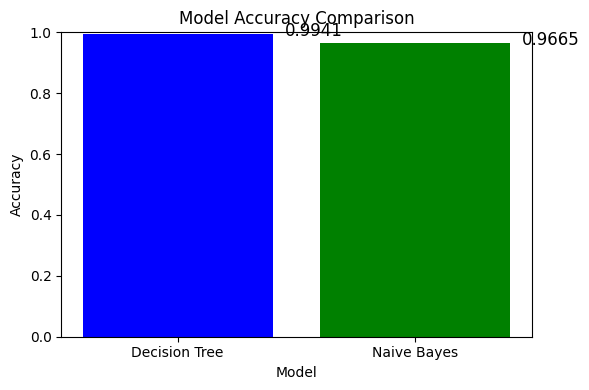

In [123]:
# Accuracy scores
accuracies = [dt_accuracy, nb_accuracy]
models = ['Decision Tree', 'Naive Bayes']

# Plot the bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=['blue', 'green'])

# Add accuracy numbers next to the bars
for bar in bars:
    yval = bar.get_height()
    # Move the text slightly to the right and raise the position of the number a little
    plt.text(bar.get_x() + bar.get_width() + 0.05, yval - 0.02, f'{yval:.4f}', ha='left', va='bottom', fontsize=12)

# Make the title font size smaller
plt.title('Model Accuracy Comparison', fontsize=12)

# Add labels and adjust layout
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.tight_layout()  # Ensures the layout is tight and avoids overlaps
plt.show()


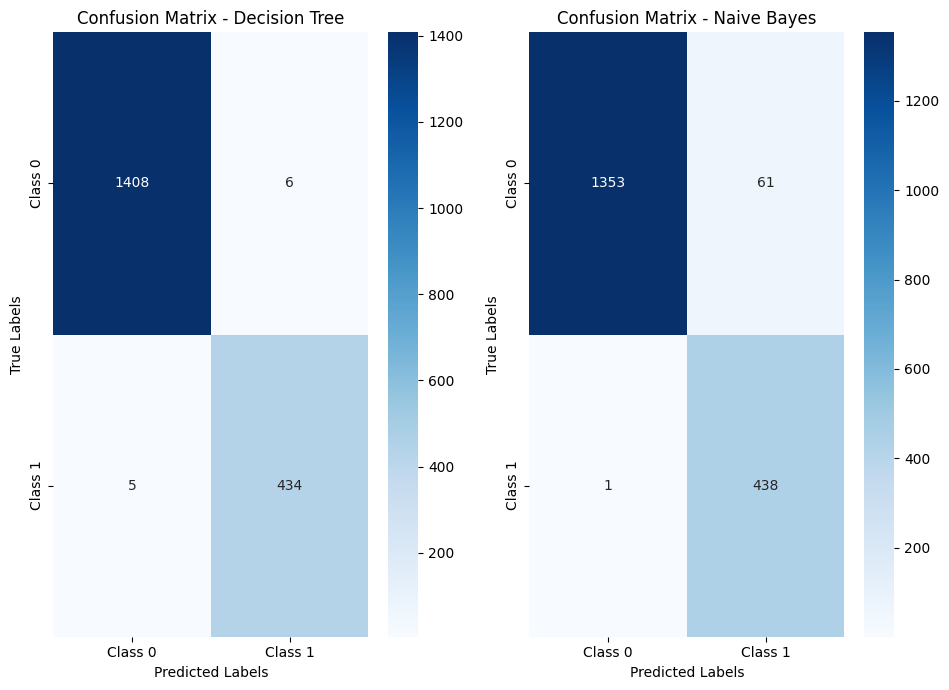

In [124]:
# Compute confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
# Compute confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Create a figure for all plots
plt.figure(figsize=(14, 7))

# Subplot 2: Confusion Matrix for Decision Tree
plt.subplot(1, 3, 2)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Subplot 3: Confusion Matrix for Naive Bayes
plt.subplot(1, 3, 3)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


The accuracy for the Decision Tree Classifier went up slightly to 99.41% from the previous 99.35%. For class 0, it was still perfect with precision at 1.00 and for class 1 we had lesser precision of 0.99 which is still very strong. Class 0 had recall equal to 1.00 and class 1 was 0.99, which means that the model correctly declared almost all instances from both class. Both classes also had high performance, as indicated by F1 scores of 1.00 for class 0 and 0.99 for class 1, which indicates that the precision and recall are almost perfect for class 0 and very high performance for class 1. Overall, these results show that the resultant Decision Tree performs very well and is overall well balanced resulting in the Decision Tree being the top performer.